# Plants for bees solution

Student: Lennert Van Sever

### Tasks
 - Clean up dataset
     - Deal with missing values
     - Convert to correct datatypes
     - Remove unecessary columns
 - Apply machine learning algorithm
 - Data visualization
 - Recommendation
 - Conclusion

## Clean up dataset

### Deal with missing values

Let's first check the data and whether there are any null values.


In [185]:
## First load in the csv data as a panda dataframe

import pandas as pd

plants_df = pd.read_csv("./data.csv")

plants_df.head(5)

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   bees_num        1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB
None


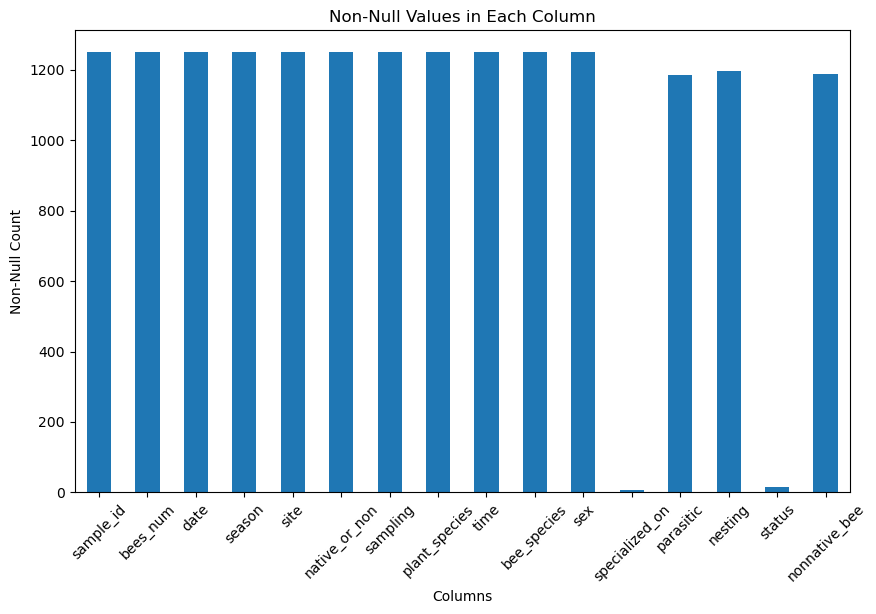

                Non-Null Percentage  Null Percentage
sample_id                    100.00             0.00
bees_num                     100.00             0.00
date                         100.00             0.00
season                       100.00             0.00
site                         100.00             0.00
native_or_non                100.00             0.00
sampling                     100.00             0.00
plant_species                100.00             0.00
time                         100.00             0.00
bee_species                  100.00             0.00
sex                          100.00             0.00
specialized_on                 0.56            99.44
parasitic                     94.96             5.04
nesting                       95.68             4.32
status                         1.20            98.80
nonnative_bee                 95.12             4.88


In [186]:
## Check which columns might have data quality issues 
print(plants_df.info())

## To visualize this better, let's create a graph based on non-null values

import matplotlib.pyplot as plt

non_null_counts = plants_df.notnull().sum()

plt.figure(figsize=(10, 6))
non_null_counts.plot(kind='bar')
plt.title('Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Non-Null Count')
plt.xticks(rotation=45)
plt.show()

## For another perspective, let's add a table that communicates the share of non-null values

total_rows = len(plants_df)
non_null_percentage = (plants_df.notnull().sum() / total_rows) * 100
null_percentage = (plants_df.isnull().sum() / total_rows) * 100

percentage_df = pd.DataFrame({'Non-Null Percentage': non_null_percentage, 'Null Percentage': null_percentage})

print(percentage_df)

In the output we can clearly see that the "specialized_on" and "status" columns barely have any non-null values. 

The "Parasitic", "nesting" and "nonnative" columns have around 95% non-null values.

The other columns the non-null values are 100%

It is clear that the "specialized_on" and "status" columns have to be addressed, let's do that now

In [187]:
## Function to easily visualize the occurence of values in data. Probably a standard function exists but this works for me
def print_value_count_table(df, column_name):    
    value_counts = df[column_name].value_counts(dropna=False).reset_index()
    value_counts.columns = ['Value', 'Count']

    print(f"Table for '{column_name}' Column:")
    print(value_counts)
    print()  # for better spacing between tables

print_value_count_table(plants_df, 'specialized_on')
print_value_count_table(plants_df, 'status')




Table for 'specialized_on' Column:
       Value  Count
0        NaN   1243
1  Penstemon      5
2    Ipomoea      2

Table for 'status' Column:
               Value  Count
0                NaN   1235
1  vulnerable (IUCN)      7
2           uncommon      6
3             common      2



The description of the columns says that

specialized_on means the plant genus the bee species preferred.
status means the status of the bee species.

This could be important data but since it's almost not available (<2%), I will remove both columns.


In [188]:
plants_df = plants_df.drop(columns=['specialized_on', 'status'])
plants_df.head(5)

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,0.0,ground,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,0.0,ground,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,0.0,ground,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,0.0,ground,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,0.0,ground,0.0


let's continue with analysing the values of the other columns that contain null values. "parasitic", "nesting" and "nonnative_bee".

In [189]:
# Reuse function that I created in a previous cell
print_value_count_table(plants_df, 'parasitic')
print_value_count_table(plants_df, 'nesting')
print_value_count_table(plants_df, 'nonnative_bee')

Table for 'parasitic' Column:
   Value  Count
0    0.0   1099
1    1.0     88
2    NaN     63

Table for 'nesting' Column:
               Value  Count
0             ground    970
1               wood    100
2  parasite [ground]     88
3                NaN     54
4               hive     32
5         wood/shell      3
6      wood/cavities      3

Table for 'nonnative_bee' Column:
   Value  Count
0    0.0   1154
1    NaN     61
2    1.0     35



For all the three columns there are some NaN values. We could address them by replacing it with the mean or median, another technique is to remove the rows with the NaN value. I will not do that since the NaN values could tell something valuable about the data in the future.

I will replace the NaN in nesting with "unknown". For the nonnative_bee and parasitic columns, we can not simply replace NaN with unknown since the other values are boolean numbers 1 or 0. There are a couple of techniques to deal with this, I will go for categorical encoding since I find it easier to deal with.

In [190]:
plants_df['nesting'] = plants_df['nesting'].fillna('unknown')
print_value_count_table(plants_df, 'nesting')


plants_df['parasitic_unknown'] = plants_df['parasitic'].isna().astype(int)
plants_df['nonnative_bee_unknown'] = plants_df['nonnative_bee'].isna().astype(int)

plants_df['parasitic'] = plants_df['parasitic'].fillna(0)
plants_df['nonnative_bee'] = plants_df['nonnative_bee'].fillna(0)

print("Non-null count in modified columns:")
print(plants_df[['parasitic', 'parasitic_unknown', 'nonnative_bee', 'nonnative_bee_unknown']].notnull().sum())

Table for 'nesting' Column:
               Value  Count
0             ground    970
1               wood    100
2  parasite [ground]     88
3            unknown     54
4               hive     32
5         wood/shell      3
6      wood/cavities      3

Non-null count in modified columns:
parasitic                1250
parasitic_unknown        1250
nonnative_bee            1250
nonnative_bee_unknown    1250
dtype: int64


Let's analyze the values of the all the columns to check if there are any other data quality issues

In [191]:
for column in plants_df.columns:
    print_value_count_table(plants_df, column)

Table for 'sample_id' Column:
    Value  Count
0   17446     45
1   17430     36
2   17473     34
3   17413     32
4   17442     31
..    ...    ...
75  17412      3
76  17459      3
77  17477      2
78  17435      1
79  17420      1

[80 rows x 2 columns]

Table for 'bees_num' Column:
    Value  Count
0      18    101
1      28     86
2      35     80
3      20     67
4      32     56
5      25     50
6      34     45
7      60     45
8       5     44
9      23     43
10     15     42
11     17     42
12     26     40
13     42     36
14     43     35
15      9     35
16     13     34
17      3     32
18      6     32
19      8     32
20     10     28
21     12     28
22      2     26
23     37     24
24      4     24
25     27     22
26      1     20
27     22     19
28     11     18
29     14     14
30     36     14
31     21     14
32     51     11
33      7     11

Table for 'date' Column:
        Value  Count
0  06/13/2017    219
1  05/26/2017    213
2  07/18/2017    204
3  07/03

After analyzing the output, in plant_species there are many "None" values. In the next Machine Learning question it will be about plant species so having "None" species is not handy. Thus I will remove the rows that contain "None" for "plant_species"

In [192]:
plants_df = plants_df[plants_df['plant_species'] != 'None']
print_value_count_table(plants_df, 'plant_species')

Table for 'plant_species' Column:
                       Value  Count
0       Leucanthemum vulgare    105
1            Rudbeckia hirta     59
2              Daucus carota     33
3      Melilotus officinalis     28
4          Cichorium intybus     25
5         Trifolium pratense     25
6   Chamaecrista fasciculata     23
7         Helenium flexuosum     19
8        Penstemon digitalis     16
9         Asclepias tuberosa     16
10           Coronilla varia     14
11         Rudbeckia triloba     13
12          Monarda punctata     11
13         Cosmos bipinnatus      9
14          Trifolium repens      6
15        Lobularia maritima      5
16      Agastache foeniculum      5
17  Pycnanthemum tenuifolium      4
18             Viola cornuta      3
19   Tradescantia virginiana      3
20        Lotus corniculatus      3
21      Trifolium incarnatum      3
22          Origanum vulgare      2



### Remove redundant columns

I'm a bit hesitant to remove columns since it could always be that a non-obvious column reveals some valuable information but to keep the dataset practical I will remove some columns that are less likely to contribute to the results that are in line with later questions

The site, date, sampling and time columns is meta data from the test that is unnecessary for our goals

I was thinking to remove season and native_or_non but both could be valuable in the future.

In [193]:
plants_df = plants_df.drop(columns=['site', 'sampling', 'date', 'time'])
plants_df.head(5)

,sample_id,bees_num,season,native_or_non,plant_species,bee_species,sex,parasitic,nesting,nonnative_bee,parasitic_unknown,nonnative_bee_unknown
87,17406,1,early.season,non-native,Trifolium incarnatum,Apis mellifera,f,0.0,hive,1.0,0,0
88,17406,2,early.season,non-native,Viola cornuta,Lasioglossum cressonii,f,0.0,wood,0.0,0,0
89,17406,2,early.season,non-native,Viola cornuta,Ceratina calcarata,f,0.0,wood,0.0,0,0
106,17409,1,early.season,non-native,Trifolium repens,Halictus parallelus,f,0.0,ground,0.0,0,0
107,17409,10,early.season,non-native,Leucanthemum vulgare,Halictus poeyi/ligatus,f,0.0,ground,0.0,0,0


### Convert to correct datatypes

Let's first print out the current data types and see where changes need to happen

In [194]:
print(plants_df.dtypes)

sample_id                  int64
bees_num                   int64
season                    object
native_or_non             object
plant_species             object
bee_species               object
sex                       object
parasitic                float64
nesting                   object
nonnative_bee            float64
parasitic_unknown          int64
nonnative_bee_unknown      int64
dtype: object


This doesn't say a lot so let's try something more advanced

In [195]:
def print_column_info(df):
    for column in df.columns:
        data_type = df[column].dtype
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values[:10]}")  # Display only the first 10 unique values for brevity
        print()  # for better spacing between columns

print_column_info(plants_df)


Column: sample_id
Data Type: int64
Unique Values: [17406 17409 17412 17415 17418 17420 17422 17425 17427 17429]

Column: bees_num
Data Type: int64
Unique Values: [ 1  2 10  3 11 13 18  5 12  8]

Column: season
Data Type: object
Unique Values: ['early.season' 'late.season']

Column: native_or_non
Data Type: object
Unique Values: ['non-native' 'native']

Column: plant_species
Data Type: object
Unique Values: ['Trifolium incarnatum' 'Viola cornuta' 'Trifolium repens'
 'Leucanthemum vulgare' 'Melilotus officinalis' 'Tradescantia virginiana'
 'Penstemon digitalis' 'Trifolium pratense' 'Monarda punctata'
 'Asclepias tuberosa']

Column: bee_species
Data Type: object
Unique Values: ['Apis mellifera' 'Lasioglossum cressonii' 'Ceratina calcarata'
 'Halictus parallelus' 'Halictus poeyi/ligatus' 'Ceratina strenua'
 'Andrena (Trachandrena)' 'Nomada articulata' 'Osmia pumila'
 'Osmia atriventris']

Column: sex
Data Type: object
Unique Values: ['f' 'm']

Column: parasitic
Data Type: float64
Unique Va

Some columns are categorical booleans but they have values like f/m or native/non-native etc. To make it easier for a machine learning algorithm, I will convert it to a numeric boolean 0/1.

In [196]:
binary_and_nominal_columns = ['native_or_non', 'sex', 'season']
plants_df = pd.get_dummies(plants_df, columns=binary_and_nominal_columns, drop_first=True)
print(plants_df.head())

     sample_id  bees_num         plant_species             bee_species  \
87       17406         1  Trifolium incarnatum          Apis mellifera   
88       17406         2         Viola cornuta  Lasioglossum cressonii   
89       17406         2         Viola cornuta      Ceratina calcarata   
106      17409         1      Trifolium repens     Halictus parallelus   
107      17409        10  Leucanthemum vulgare  Halictus poeyi/ligatus   

     parasitic nesting  nonnative_bee  parasitic_unknown  \
87         0.0    hive            1.0                  0   
88         0.0    wood            0.0                  0   
89         0.0    wood            0.0                  0   
106        0.0  ground            0.0                  0   
107        0.0  ground            0.0                  0   

     nonnative_bee_unknown  native_or_non_non-native  sex_m  \
87                       0                         1      0   
88                       0                         1      0   
89   

This creates some strange columns names like native_or_non_non-native so let's replace with something clearer

In [197]:
plants_df.rename(columns={'native_or_non_non-native': 'is_non_native', 
                                  'sex_m': 'is_male',
                                  }, inplace=True)

print(plants_df.head())

     sample_id  bees_num         plant_species             bee_species  \
87       17406         1  Trifolium incarnatum          Apis mellifera   
88       17406         2         Viola cornuta  Lasioglossum cressonii   
89       17406         2         Viola cornuta      Ceratina calcarata   
106      17409         1      Trifolium repens     Halictus parallelus   
107      17409        10  Leucanthemum vulgare  Halictus poeyi/ligatus   

     parasitic nesting  nonnative_bee  parasitic_unknown  \
87         0.0    hive            1.0                  0   
88         0.0    wood            0.0                  0   
89         0.0    wood            0.0                  0   
106        0.0  ground            0.0                  0   
107        0.0  ground            0.0                  0   

     nonnative_bee_unknown  is_non_native  is_male  season_late.season  
87                       0              1        0                   0  
88                       0              1       

Another thing to do is to a replace the float type with an integer if it is applicable

In [198]:
plants_df['parasitic'] = plants_df['parasitic'].astype(int)
plants_df['nonnative_bee'] = plants_df['nonnative_bee'].astype(int)
plant_df_simple = plants_df
print(plants_df.head())

     sample_id  bees_num         plant_species             bee_species  \
87       17406         1  Trifolium incarnatum          Apis mellifera   
88       17406         2         Viola cornuta  Lasioglossum cressonii   
89       17406         2         Viola cornuta      Ceratina calcarata   
106      17409         1      Trifolium repens     Halictus parallelus   
107      17409        10  Leucanthemum vulgare  Halictus poeyi/ligatus   

     parasitic nesting  nonnative_bee  parasitic_unknown  \
87           0    hive              1                  0   
88           0    wood              0                  0   
89           0    wood              0                  0   
106          0  ground              0                  0   
107          0  ground              0                  0   

     nonnative_bee_unknown  is_non_native  is_male  season_late.season  
87                       0              1        0                   0  
88                       0              1       

In the next part I will use the KNN algorithm, in order to properly use this algorithm I need to add some  Categorical Data Encoding for the 'plant_species' column. I will also remove other non-numerical columns that are not contributing to the next question since KNN requires only numerical columns.

In [199]:
categorical_columns = ['plant_species']
plants_df = pd.get_dummies(plants_df, columns=categorical_columns)
print(plants_df.head())

     sample_id  bees_num             bee_species  parasitic nesting  \
87       17406         1          Apis mellifera          0    hive   
88       17406         2  Lasioglossum cressonii          0    wood   
89       17406         2      Ceratina calcarata          0    wood   
106      17409         1     Halictus parallelus          0  ground   
107      17409        10  Halictus poeyi/ligatus          0  ground   

     nonnative_bee  parasitic_unknown  nonnative_bee_unknown  is_non_native  \
87               1                  0                      0              1   
88               0                  0                      0              1   
89               0                  0                      0              1   
106              0                  0                      0              1   
107              0                  0                      0              1   

     is_male  ...  plant_species_Origanum vulgare  \
87         0  ...                            

In [200]:
plants_df = plants_df.drop(columns=['nesting', 'bee_species'])
plants_df.head(5)

,sample_id,bees_num,parasitic,nonnative_bee,parasitic_unknown,nonnative_bee_unknown,is_non_native,is_male,season_late.season,plant_species_Agastache foeniculum,...,plant_species_Origanum vulgare,plant_species_Penstemon digitalis,plant_species_Pycnanthemum tenuifolium,plant_species_Rudbeckia hirta,plant_species_Rudbeckia triloba,plant_species_Tradescantia virginiana,plant_species_Trifolium incarnatum,plant_species_Trifolium pratense,plant_species_Trifolium repens,plant_species_Viola cornuta
87,17406,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
88,17406,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89,17406,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,17409,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
107,17409,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying Machine Learning algorithm

As mentioned before, the KNN algorithm will be used to determine which plants are preferred by native vs non-native bee species.

Having result 1 for the first classification and 0 for the next is probably not what we want.
It means that one classification sucks up everything.

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

X = plants_df.drop(columns=['nonnative_bee', 'nonnative_bee_unknown'])  # Features
y = plants_df['nonnative_bee']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

combined_X = pd.concat([X_train, X_test]).reset_index(drop=True)
combined_y = pd.concat([y_train, y_test]).reset_index(drop=True)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(combined_X, combined_y)

def find_common_plants(X, y, label, knn_model, top_n=5):
    indices = y[y == label].index
    plant_counter = Counter()

    for idx in indices:
        neighbors_idx = knn_model.kneighbors([X.iloc[idx]], n_neighbors=5, return_distance=False)[0]
        for neighbor in neighbors_idx:
            plants = X.iloc[neighbor].filter(like='plant_species_')
            favored_plants = plants[plants > 0].index.tolist()
            plant_counter.update(favored_plants)

    return plant_counter.most_common(top_n)

common_plants_native = find_common_plants(combined_X, combined_y, 0, knn)
common_plants_non_native = find_common_plants(combined_X, combined_y, 1, knn)

print("Common plants preferred by native bees:", common_plants_native)
print("Common plants preferred by non-native bees:", common_plants_non_native)


Common plants preferred by native bees: [('plant_species_Leucanthemum vulgare', 526), ('plant_species_Rudbeckia hirta', 289), ('plant_species_Daucus carota', 164), ('plant_species_Melilotus officinalis', 136), ('plant_species_Cichorium intybus', 125)]
Common plants preferred by non-native bees: [('plant_species_Daucus carota', 5), ('plant_species_Viola cornuta', 2), ('plant_species_Trifolium incarnatum', 1), ('plant_species_Trifolium repens', 1), ('plant_species_Leucanthemum vulgare', 1)]


## Data visualization

First a visualization of the distribution of plant and bees species seperately from each other

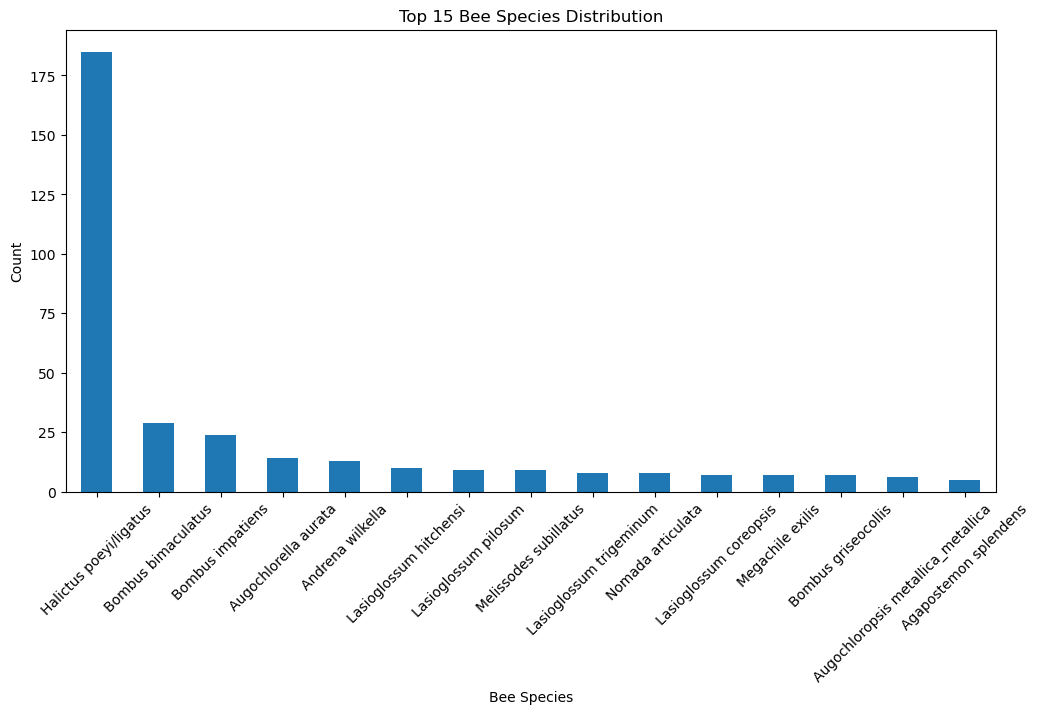

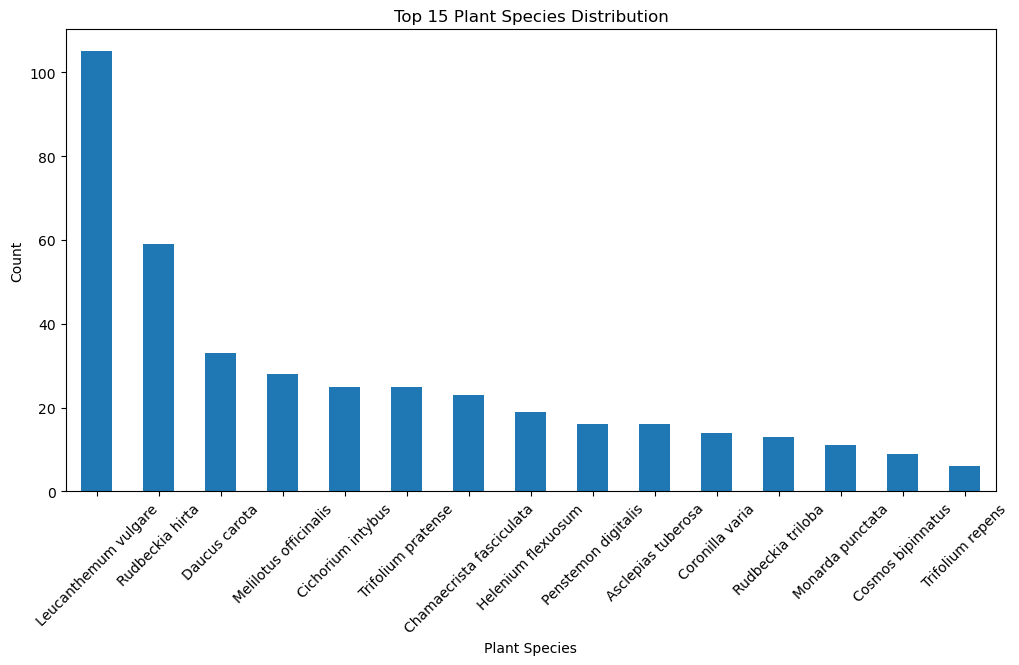

In [202]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plant_df_simple['bee_species'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Bee Species Distribution')
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plant_df_simple['plant_species'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Plant Species Distribution')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The next visualization shows how different bees/plant species relate to each other. Probably giving a better idea of the distribution. I also added a non-native/native label to the bee species to make analysis easier.

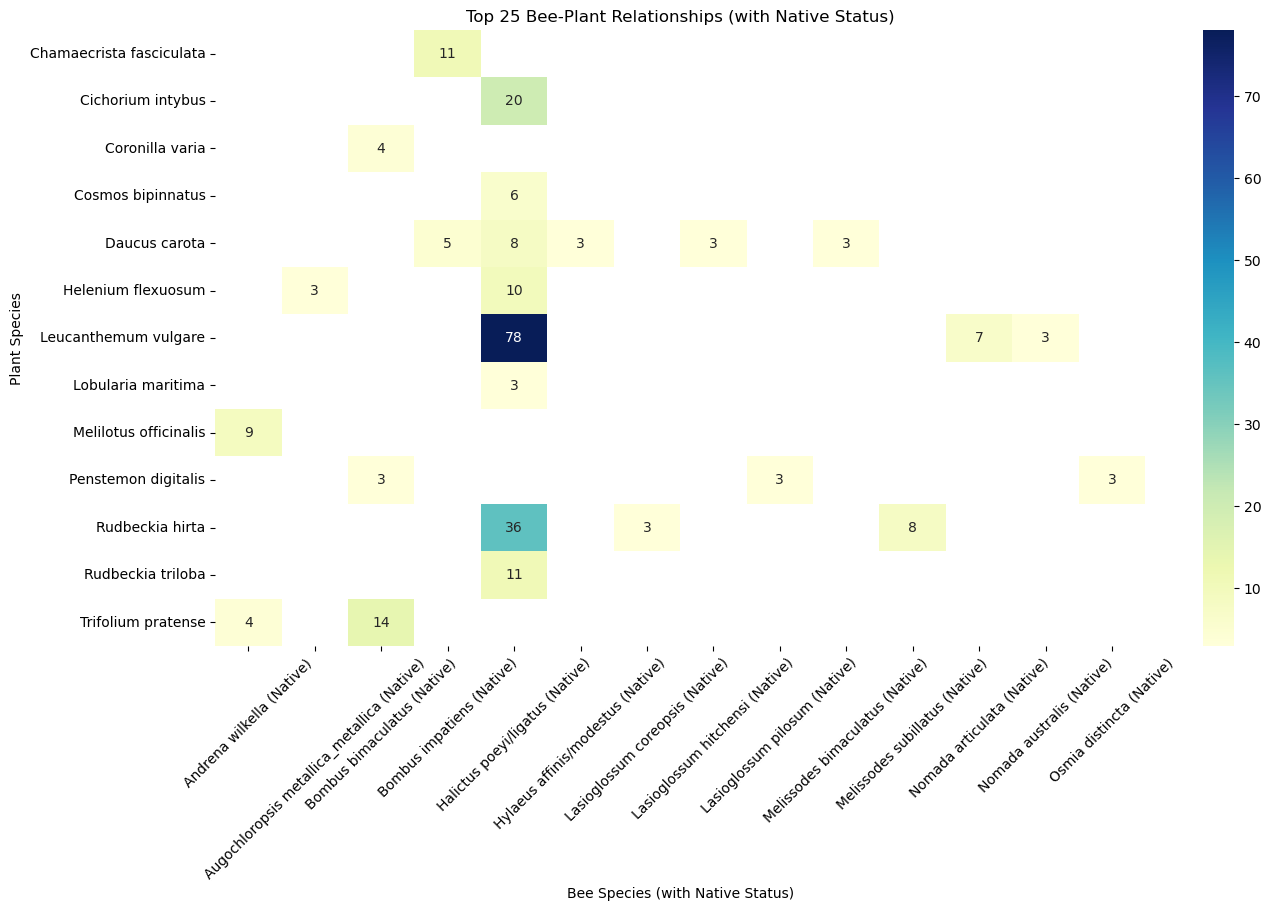

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plant_df_simple['bee_species_with_status'] = plant_df_simple['bee_species'] + \
                                             plant_df_simple['nonnative_bee'].map(lambda x: ' (Non-native)' if x else ' (Native)')

pair_counts = plant_df_simple.groupby(['plant_species', 'bee_species_with_status']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(25)
pivot_table = top_pairs.pivot('plant_species', 'bee_species_with_status', 'count')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Top 25 Bee-Plant Relationships (with Native Status)')
plt.xlabel('Bee Species (with Native Status)')
plt.ylabel('Plant Species')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Recommendation

In order to support native bees I would recommend the following plants:

- Leucanthemum vulgare plant species, since it relates heavily with the Bumbus impatiens which is also a native bee. The KNN algorithm also gave the best points to this species
- Rudbeckia hirta, same reason as the first option but the relationship degree is a bit lower
- Daucus carota, third place on KNN for native bees. It doesn't have a high relationship score but it's pretty attractive for several native bees. Could be a good underdog option

## Conclusion

By cleaning the data, applying the KNN algorithm and the visualization, we were able to give a recommendation of plant species to support native bees. To give one for non-native bees would have been difficult since the KNN had weird scores for non-native bees.

For education purposes it's a good exercise but in the professional world it would be a bad idea to let a data scientist without knowledge of specialized biology or ecology give recommendation like this. We only worked with the data of the samples, nature works in a much more complex way that is hard to understand especially for a data scientist.

To do this properly, a team of data scientists and experts in biology/ecology need to collaborate to come with a proper recommendation. 